In [82]:
# Initial Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [84]:
nba = pd.read_csv('Data/Clean_2017_NBA_Stats.csv', index_col=[0])
nba

,Player,Pos,Salary,Country,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Brooks,PG,2116955,USA,32,IND,65,0,894,9.5,...,0.800,18,51,69,125,25,9,66,93,322
2,Aaron Gordon,SF,5504420,USA,21,ORL,80,72,2298,14.4,...,0.719,116,289,405,150,64,40,89,172,1019
3,Aaron Harrison,SG,83129,USA,22,CHO,5,0,17,-2.2,...,0.500,0,3,3,3,0,0,0,2,1
4,Al Horford,C,27734405,Dominican Rep...,30,BOS,68,68,2193,17.7,...,0.800,95,369,464,337,52,87,116,138,952
5,Al Jefferson,C,9769821,USA,32,IND,66,1,931,18.9,...,0.765,75,203,278,57,19,16,33,125,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Wilson Chandler,SF,12016854,USA,29,DEN,71,33,2197,14.9,...,0.727,103,356,459,141,52,30,114,172,1117
378,Yogi Ferrell,PG,1312611,USA,23,TOT,46,29,1197,13.1,...,0.831,20,91,111,172,42,9,70,90,462
379,Zach LaVine,SG,3202217,USA,21,MIN,47,47,1749,14.6,...,0.836,18,141,159,139,41,10,85,104,889
380,Zach Randolph,PF,12307692,USA,35,MEM,73,5,1786,18.5,...,0.731,182,416,598,122,38,10,99,136,1028


In [85]:
# nba = nba.dropna(how='all') There are no null values
nba.dropna()
nba

,Player,Pos,Salary,Country,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Brooks,PG,2116955,USA,32,IND,65,0,894,9.5,...,0.800,18,51,69,125,25,9,66,93,322
2,Aaron Gordon,SF,5504420,USA,21,ORL,80,72,2298,14.4,...,0.719,116,289,405,150,64,40,89,172,1019
3,Aaron Harrison,SG,83129,USA,22,CHO,5,0,17,-2.2,...,0.500,0,3,3,3,0,0,0,2,1
4,Al Horford,C,27734405,Dominican Rep...,30,BOS,68,68,2193,17.7,...,0.800,95,369,464,337,52,87,116,138,952
5,Al Jefferson,C,9769821,USA,32,IND,66,1,931,18.9,...,0.765,75,203,278,57,19,16,33,125,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Wilson Chandler,SF,12016854,USA,29,DEN,71,33,2197,14.9,...,0.727,103,356,459,141,52,30,114,172,1117
378,Yogi Ferrell,PG,1312611,USA,23,TOT,46,29,1197,13.1,...,0.831,20,91,111,172,42,9,70,90,462
379,Zach LaVine,SG,3202217,USA,21,MIN,47,47,1749,14.6,...,0.836,18,141,159,139,41,10,85,104,889
380,Zach Randolph,PF,12307692,USA,35,MEM,73,5,1786,18.5,...,0.731,182,416,598,122,38,10,99,136,1028


In [91]:
# Assign X (data) and y (target) 
# X = Games played, Draft#, Minutes Played
# Y = Salary
# 'FT%', 'FG%', 'BLK%', 'STL%', 'AST%'

X = nba[['G', 'PTS',]]
y = nba["Salary"].values.reshape(-1, 1)
print(X.shape, y.shape)

(381, 2) (381, 1)


In [92]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [94]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [95]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

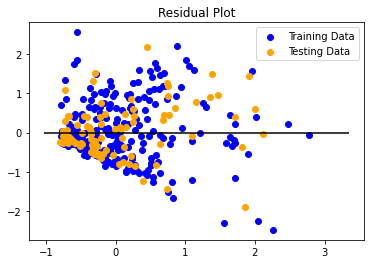

In [96]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [97]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.42216666179556533, R2: 0.6306411851419966


In [98]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.429390359773421, R2: 0.6243210827619443


In [99]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4221777096354217, R2: 0.6306315192507613


In [100]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.42728969822680246, R2: 0.6261589774359972


In [74]:
# Things to solve:
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
# Why can't the linear regression handle negative or zero values for any of the % columns? (float64)
# Random Forest / Decision Tree